In [2]:
import sys
sys.argv.append("-lc=C:/Workspaces/AIC/simod/local_config_files/AIC/vga-gap_0002.cfg")
from amodsim.init import config

INFO:root:Loading config for project RoadmaptoolsConfig (can be overwritten later)
INFO:root:map_dir: FILL YOUR MAP DIR HERE
osm_source_url: https://s3.amazonaws.com/metro-extracts.mapzen.com/valencia_spain.osm.bz2
osm_map_filename: FILL YOUR MAP DIR HEREmap.osm
filtered_osm_filename: FILL YOUR MAP DIR HEREmap-filtered.osm
geojson_file: FILL YOUR MAP DIR HEREmap.geojson
cleaned_geojson_file: FILL YOUR MAP DIR HEREmap-cleaned.geojson
sanitized_geojson_file: FILL YOUR MAP DIR HEREmap-sanitized.geojson
simplified_file: FILL YOUR MAP DIR HEREmap-simplified.geojson
simplified_file_with_speed: FILL YOUR MAP DIR HEREmap-simplified-speed.geojson
simplified_file_with_speed_and_curvature: FILL YOUR MAP DIR HEREmap-simplified-speed-curvature.geojson
ap_nodes_file: FILL YOUR MAP DIR HEREnodes.geojson
ap_edges_file: FILL YOUR MAP DIR HEREedges.geojson
utm_center_lon: 50.0877506
utm_center_lat: 14.4209293
shift_utm_coordinate_origin_to_utm_center: False
shapely_error_tolerance: 0.005
osm_filter_para

In [2]:
# using the matplotlib inline mode, we can see the progress when updating our figure
%matplotlib inline

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

from amodsim.statistics.comparisons.common import Experiment

In [4]:
ridesharing_filepath = r"C:/AIC Experiment Data/VGA/experiments/vga_gap_0002/ridesharing.csv"
ridesharing_filepath_lim = r"C:/AIC Experiment Data/VGA/experiments/vga-lim_gap_005_gg_60ms/ridesharing.csv"

max_possible_group_size = 15

In [5]:
with open(ridesharing_filepath, 'r', encoding="utf-8") as ridesharing:
    r = pd.read_csv(ridesharing)

with open(ridesharing_filepath_lim, 'r', encoding="utf-8") as ridesharing:
    r_lim = pd.read_csv(ridesharing)

In [6]:
def get_max_group_size_row(row: pd.Series) -> int:
    for size in range(1, max_possible_group_size):
        column_name = "{} Groups Count".format(size)
        if column_name in row and row[column_name] > 0:
            continue
        else:
            return size - 1

In [7]:
def get_group_times_per_row(row: pd.Series) -> pd.Series:
    times = []
    for size in range(1, max_possible_group_size):
        column_name = "{} Groups Total Time".format(size)
        if column_name in row:
            times.append(row[column_name])
        else:
            break
    return pd.Series(times)

In [8]:
def get_group_counts_per_row(row: pd.Series) -> pd.Series:
    counts = []
    for size in range(1, max_possible_group_size):
        column_name = "{} Groups Count".format(size)
        if column_name in row:
            counts.append(row[column_name])
        else:
            break
    return pd.Series(counts)

In [10]:
max_group_sizes = r.apply(get_max_group_size_row, axis=1)
max_group_sizes_lim = r_lim.apply(get_max_group_size_row, axis=1)

In [11]:
optimal_color = Experiment.VGA.color
limited_color = Experiment.VGA_LIMITED.color

In [12]:
@ticker.FuncFormatter
def minute_formater(x, pos):
    return "{}".format(int(x / 2))

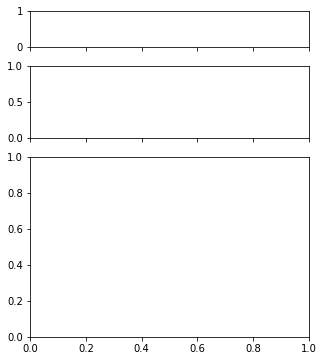

In [24]:
fig, axes = plt.subplots(3,1, figsize=(5,6), gridspec_kw={'height_ratios': [1, 2, 5]}, sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

In [25]:
# Axis 1 - Active Requests
ax1.plot(r["Active Request Count"] / 1000, color="red")
ax1.set_ylabel(r"Ac. req. $ \times 10^3 $")

Text(12.700000000000003, 0.5, 'Ac. req. $ \\times 10^3 $')

In [26]:
# Axis 2 - Max Group Size
ax2.plot(max_group_sizes, label="VGA optimal", color=optimal_color)
ax2.plot(max_group_sizes_lim, label="VGA limited", color=limited_color)
ax2.set_ylabel("Max group size")
ax2.set_ylim(1.5, 12)
ax2.set_yticks(np.arange(2, 13, 2))
ax2.legend(loc=4, prop={'size': 8})

In [27]:
# Axis 3
ax3.plot(r["Group Generation Time"] / 1000, '-', label="VGA optimal group generation time", color=optimal_color)
ax3.plot(r["Solver Time"] / 1000, '--', label="VGA optimal ILP solver time", color="aqua")
ax3.plot(r_lim["Group Generation Time"] / 1000, '-.', label="VGA limited group generation time", color=limited_color)
ax3.plot(r_lim["Solver Time"] / 1000, ':', label="VGA limited ILP solver time", color="orangered")
ax3.set_ylabel("Comp. time [s]")
ax3.set_ylim(0.5, 16000)
ax3.set_yscale("log")
ax3.legend(loc=1, prop={'size': 8})

In [28]:
ax3.set_xlabel("Simulation time [min]")
ax3.set_xlim(0, 180)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax3.xaxis.set_major_formatter(minute_formater)

In [29]:
fig.savefig(config.images.vga_times, bbox_inches='tight', transparent=True)

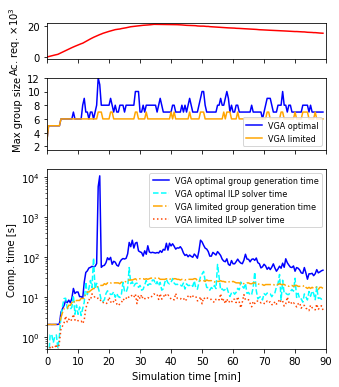

In [30]:
fig

In [9]:
get_max_group_size_row(r.iloc[0])

3

In [ ]:
rt

In [1]:
%%javascript
// render cell content fully instead of using scroll bar
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>